In [1]:
import numpy as np
import scipy as sc
from least_squares_lh import*
import pandas as pd
#from fitter_v2 import*
import time 
from datetime import datetime

In [2]:
matrix = np.array([[0.000824,  1.26e-05 , 2.5e-05,  2.02e-06    ,     0   ,      0 , 0.000146     ,    0 , 0.000146     ,    0    ,     0 ,  -0.0162 , 9.17e-05 , 3.19e-05 ],
[  1.26e-05 , 6.93e-06 , 2.75e-07 ,-5.55e-08 ,        0  ,       0 , 1.65e-06   ,      0 , 5.08e-06  ,       0    ,     0, -0.000252,  8.21e-07  , 2.7e-07] ,
 [  2.5e-05,  2.75e-07 , 2.49e-05,  3.89e-08  ,       0   ,      0 ,-1.32e-06    ,     0,  4.89e-06  ,       0     ,    0, -0.000494 , 4.98e-07 , 9.72e-07] ,
 [2.02e-06, -5.55e-08 , 3.89e-08,  6.19e-07  ,       0   ,      0,  1.78e-07   ,      0 , 1.38e-06    ,    0     ,    0, -4.09e-05 , 1.44e-07 , 5.34e-09 ],
  [       0  ,       0  ,       0 ,        0  ,       0    ,     0 ,        0  ,       0 ,        0    ,     0    ,     0  ,       0     ,    0 ,        0] ,
   [      0 ,        0 ,        0  ,       0   ,      0   ,      0,         0  ,       0,         0      ,   0     ,    0  ,       0   ,      0 ,        0 ],
  [0.000146 , 1.65e-06 ,-1.32e-06 , 1.78e-07 ,        0  ,       0 , 0.000453  ,       0 , 2.94e-05  ,       0   ,      0,  -0.00288 , 7.29e-06 , 5.31e-06 ],
   [      0 ,        0 ,        0 ,        0  ,       0  ,       0,         0 ,       0 ,        0     ,    0    ,     0 ,        0,         0  ,       0 ],
 [0.000146 , 5.08e-06,  4.89e-06 , 1.38e-06 ,        0   ,      0 , 2.94e-05,         0 , 0.000779   ,     0    ,     0 , -0.00284, 1.86e-05 , 6.25e-06 ],
  [     0 ,        0  ,       0  ,       0  ,       0 ,       0   ,      0   ,      0   ,      0     ,    0    ,     0  ,       0  ,       0 ,        0 ],
   [      0 ,        0 ,       0  ,       0 ,        0 ,        0 ,        0  ,       0 ,        0    ,     0    ,     0  ,       0  ,       0 ,        0] ,
   [-0.0162 ,-0.000252, -0.000494, -4.09e-05  ,       0 ,        0,  -0.00288   ,      0 , -0.00284 ,        0    ,     0  ,   0.321 , -0.00181 , -0.00063] ,
  [9.17e-05 , 8.21e-07,  4.98e-07 , 1.44e-07 ,        0   ,      0 , 7.29e-06 ,        0 , 1.86e-05  ,       0   ,      0, -0.00181 , 9.18e-05 , 3.53e-06 ],
  [3.19e-05 ,  2.7e-07, 9.72e-07,  5.34e-09   ,      0 ,        0 , 5.31e-06   ,      0 , 6.25e-06     ,    0    ,    0 , -0.00063 , 3.53e-06,  8.24e-06 ]])


In [3]:
#matrix

In [4]:
mean1 = np.array([ 0.19596872 ,-0.21939327, -0.33989512, -0.11168205 , 0.  ,        0.,
  2.45843146,  0.      ,    3.33766712 , 0.  ,        0. ,         2.06037866,
  2.6901086 ,  0.39864058])

In [5]:
mean1


array([ 0.19596872, -0.21939327, -0.33989512, -0.11168205,  0.        ,
        0.        ,  2.45843146,  0.        ,  3.33766712,  0.        ,
        0.        ,  2.06037866,  2.6901086 ,  0.39864058])

In [6]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]

In [7]:
#x, y = np.random.multivariate_normal(mean, cov, 10).T

In [8]:
#x

In [9]:
#y

In [10]:
new = np.random.multivariate_normal(mean1, matrix, 200000).T

In [11]:
new.shape

(14, 200000)

In [12]:
#new[4]

In [13]:
df = pd.read_csv('fit_hadron_coef_0.25_chi_1.202__True_gk_ll_lgm.csv')

In [14]:
df['coef'].drop

<bound method Series.drop of 0    0.25
Name: coef, dtype: float64>

In [15]:
d1 = df.drop(['coef'], axis = 1) 

In [16]:
d1

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS,chi_sq
0,0.195969,-0.219393,-0.339895,-0.111682,0.0,0.0,2.458431,0.0,3.337667,0.0,0.0,2.060379,2.690109,0.398641,1.202


In [17]:
df.append

<bound method DataFrame.append of         NUP       NDO       NST      NSEA  AUP  ADO       AST  ASEA       BUP  \
0  0.195969 -0.219393 -0.339895 -0.111682  0.0  0.0  2.458431   0.0  3.337667   

   BDO  BST      BSEA        PP       MSS  coef  chi_sq  
0  0.0  0.0  2.060379  2.690109  0.398641  0.25   1.202  >

In [18]:
df_new = pd.DataFrame(columns = df.columns)

In [19]:
df_new['NUP']=new[0]
df_new['NDO']=new[1]
df_new['NST']=new[2]
df_new['NSEA']=new[3]
df_new['AUP']=new[4]
df_new['ADO']=new[5]
df_new['AST']=new[6]
df_new['ASEA']=new[6]
df_new['BUP']=new[7]
df_new['BDO']=new[8]
df_new['BST']=new[9]
df_new['BSEA']=new[10]
df_new['PP']=new[11]
df_new['MSS']=new[12]

In [20]:
df_new

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS,coef,chi_sq
0,0.202464,-0.220829,-0.346638,-0.112603,2.540483e-12,-4.532260e-11,2.479636,2.479636,-1.327546e-11,3.384046,-1.855117e-19,1.936632e-20,1.938891,2.680980,NaN,NaN
1,0.131070,-0.216603,-0.344929,-0.111201,-6.599941e-12,-6.710182e-11,2.444647,2.444647,-1.195005e-11,3.342221,1.666079e-19,-2.754102e-21,3.316071,2.687641,NaN,NaN
2,0.203818,-0.220480,-0.336543,-0.110395,-8.214965e-12,-1.030223e-10,2.476972,2.476972,-4.690833e-11,3.363427,-3.561897e-19,-1.082941e-20,1.932701,2.679532,NaN,NaN
3,0.210529,-0.216418,-0.335931,-0.112108,-1.320175e-11,-3.465516e-11,2.464153,2.464153,-2.349942e-11,3.390973,-7.632047e-20,2.236183e-21,1.786363,2.705086,NaN,NaN
4,0.192839,-0.224681,-0.341388,-0.111802,1.990667e-12,-1.505548e-11,2.449906,2.449906,2.512782e-11,3.378303,-1.076524e-19,3.499376e-21,2.107562,2.692267,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.198680,-0.224120,-0.342283,-0.111670,9.499027e-13,7.899351e-12,2.448351,2.448351,7.481066e-12,3.356331,-4.185170e-19,-1.375055e-21,1.969053,2.694210,NaN,NaN
199996,0.161176,-0.222792,-0.351391,-0.112099,5.023473e-12,9.420142e-11,2.433883,2.433883,2.571060e-11,3.349220,1.610392e-19,-3.727846e-21,2.729491,2.689056,NaN,NaN
199997,0.194713,-0.220325,-0.329697,-0.111782,3.557866e-12,5.084146e-11,2.460532,2.460532,1.979696e-11,3.265157,4.965173e-19,-1.087626e-20,2.068924,2.712180,NaN,NaN
199998,0.194865,-0.220547,-0.346804,-0.112103,1.085059e-11,5.715987e-11,2.404585,2.404585,9.406422e-12,3.374307,-2.664235e-19,-1.607624e-20,2.115086,2.695495,NaN,NaN


In [21]:
lst =least_sq(5,'all')
lst.g_k_2h = 'll_lgm'
lst.g_k_1h = 'll_lgm'

lst.mdl_num = 'pwr_lw_star'
lst.mdl_den = 'pwr_lw_star'



In [22]:
lst.coef=0.25

In [23]:
nup = df_new['NUP'].to_numpy()
ndo = df_new['NDO'].to_numpy()
nst = df_new['NST'].to_numpy()
nsea = df_new['NSEA'].to_numpy()

aup = df_new['AUP'].to_numpy()
ado = df_new['ADO'].to_numpy()
ast = df_new['AST'].to_numpy()
asea = df_new['ASEA'].to_numpy()

bup = df_new['BUP'].to_numpy()
bdo = df_new['BDO'].to_numpy()
bst = df_new['BST'].to_numpy()
bsea = df_new['BSEA'].to_numpy()

pp = df_new['PP'].to_numpy()
mss= df_new['MSS'].to_numpy()

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 4.000e+00,
        5.000e+00, 6.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 1.400e+01,
        9.000e+00, 6.000e+00, 1.900e+01, 1.200e+01, 1.200e+01, 1.600e+01,
        1.500e+01, 1.500e+01, 1.700e+01, 1.700e+01, 2.700e+01, 2.200e+01,
        3.100e+01, 1.900e+01, 2.900e+01, 3.500e+01, 4.900e+01, 5.400e+01,
        4.600e+01, 4.600e+01, 5.700e+01, 6.400e+01, 5.600e+01, 7.500e+01,
        8.400e+01, 8.400e+01, 1.060e+02, 1.040e+02, 1.240e+02, 1.090e+02,
        1.090e+02, 1.480e+02, 1.680e+02, 1.630e+02, 1.570e+02, 2.160e+02,
        2.060e+02, 1.990e+02, 2.390e+02, 2.540e+02, 2.800e+02, 2.630e+02,
        3.000e+02, 3.270e+02, 3.630e+0

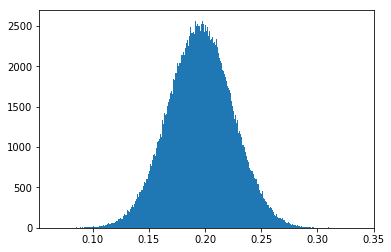

In [24]:
plt.hist(df_new.NUP,bins=300)

In [24]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
lst_vec=zeros(len(nup))
i=0
for NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS in zip(nup,ndo,nst,nsea,aup,ado,ast,asea,bup,bdo,bst,bsea,pp,mss) :
    #print(NUP)
    #print(AST)
    lst_vec[i]= lst.least_squares_lh(NUP,NDO,NST,NSEA,0.,0.,AST,0.,BUP,0.,0.,BSEA,PP,MSS)
    i+=1
    

end = time.time()

mins=(end -start)/60
print('¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯')
print('time passed:')

print(str(end - start) +'   ' + 'sec')
print(str((end - start)/60) +'   ' + 'min')



Current Time = 18:40:00


/home/zackmrc/Documenti/git_project/lambda_fit/def_convolution_v3.1_survey/model_fct.py:141: RuntimeWarning: floating point number truncated to an integer
  bssl1 = special.kn(pwr-1,b_new*mass)
/home/zackmrc/Documenti/git_project/lambda_fit/def_convolution_v3.1_survey/def_crs.py:186: RuntimeWarning: invalid value encountered in double_scalars
  dup1=dup1*nup*zlc1**aup*(1.-zlc1)**bup/ ( aup**aup * bup**bup / (aup+bup)**(aup+bup) )
/home/zackmrc/Documenti/git_project/lambda_fit/def_convolution_v3.1_survey/def_crs.py:190: RuntimeWarning: invalid value encountered in double_scalars
  dupb1=dupb1*nupb*zlc1**aupb*(1.-zlc1)**bupb/ ( aupb**aupb * bupb**bupb / (aupb+bupb)**(aupb+bupb) )
/home/zackmrc/Documenti/git_project/lambda_fit/def_convolution_v3.1_survey/def_crs.py:191: RuntimeWarning: invalid value encountered in double_scalars
  ddob1=ddob1*ndob*zlc1**adob*(1.-zlc1)**bdob/ ( adob**adob * bdob**bdob / (adob+bdob)**(adob+bdob) )
/home/zackmrc/Documenti/git_project/lambda_fit/def_convoluti

NameError: name 'start' is not defined

In [ ]:
#lst_vec

In [ ]:
lst.least_squares_lh(mean1[0],mean1[1],mean1[2],mean1[3],\
                     mean1[4],mean1[5],mean1[6],mean1[7],\
                     mean1[8],mean1[9],mean1[10],mean1[11],mean1[12],mean1[13])

In [ ]:
mean1

In [ ]:
df_new['chi']=lst_vec

In [25]:

df_new

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS,coef,chi_sq
0,0.224446,-0.220244,-0.336594,-0.112094,1.553743e-11,7.946606e-11,2.467722,2.467722,2.887627e-11,3.357013,-5.877408e-20,7.459807e-21,1.456266,2.711881,NaN,NaN
1,0.195970,-0.223657,-0.323908,-0.109757,-4.642472e-13,8.631464e-12,2.443428,2.443428,-3.628601e-11,3.343435,1.397120e-19,-1.196611e-20,2.028250,2.706926,NaN,NaN
2,0.194772,-0.224546,-0.340939,-0.110475,3.648868e-12,-4.318884e-12,2.483008,2.483008,5.169170e-11,3.292960,-9.625734e-19,-2.455527e-21,2.173453,2.696609,NaN,NaN
3,0.206323,-0.222995,-0.347454,-0.111421,4.206689e-12,3.914222e-11,2.512189,2.512189,-3.203919e-11,3.369497,5.977667e-19,2.263942e-20,1.889495,2.695273,NaN,NaN
4,0.180752,-0.214863,-0.343403,-0.110718,1.181011e-12,-4.077599e-11,2.426655,2.426655,-4.108116e-11,3.340275,-1.752413e-19,-2.771675e-20,2.366283,2.683971,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.167930,-0.220638,-0.338236,-0.112028,4.110886e-12,1.600472e-11,2.465700,2.465700,-6.216670e-12,3.343888,2.439283e-19,1.477294e-20,2.579369,2.681592,NaN,NaN
196,0.258226,-0.221293,-0.335551,-0.111181,-1.456817e-12,4.122173e-11,2.439662,2.439662,-8.989547e-12,3.323250,-2.643077e-19,-7.206175e-22,0.826861,2.689072,NaN,NaN
197,0.154741,-0.221236,-0.343480,-0.112428,3.046346e-12,5.710699e-11,2.476451,2.476451,8.548784e-12,3.331436,-2.197569e-19,1.812066e-21,2.899998,2.678747,NaN,NaN
198,0.189355,-0.222583,-0.331639,-0.112390,-2.776570e-12,1.275522e-13,2.464050,2.464050,-2.175040e-11,3.352148,-2.495583e-19,1.692101e-20,2.224706,2.673047,NaN,NaN


In [26]:
lst_vec

array([1543.73536254,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
       1440.46755059,           nan,           nan, 1419.12219288,
                 nan, 1283.52537922,           nan,           nan,
                 nan, 1565.09180399,           nan, 1488.17228554,
       1463.16488232,           nan,           nan, 1436.70945163,
                 nan, 1499.99140937,           nan,           nan,
                 nan,           nan, 1404.76523277, 1498.98347545,
                 nan,           nan,           nan,           nan,
       1531.41385216,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
       1434.27728213,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           